In [1]:
import os
os.chdir("../")
print(os.getcwd())

d:\PhD_Projects\Mori-Zwanzig-Autoencoder


In [2]:
import torch, pickle, os
from torch.utils.data import Dataset, DataLoader
from src.PreProc_Data.DataProc import StackedSequenceDataset
import numpy as np
from src.Eval_MZA import Eval_MZA
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
torch.cuda.empty_cache()
exp_dir   = "Trained_Models/Exp3.3_Transient_2DCyl_Numobstest_ts29_T200_localtest_deactivate_seqmodel"  #Experiment Directory
# exp_name  = "sl32_nhu40_numobs8_bs16_lr5e-5"                #One of the experiment names

models = []
#Non transient data analysis
# exp_name_list = ["sl8_nhu40_numobs2_bs16_lr5e-5_3",\
#                  "sl8_nhu40_numobs3_bs16_lr5e-5_3",\
#                  "sl8_nhu40_numobs4_bs16_lr5e-5_2",\
#                  "sl8_nhu40_numobs8_bs16_lr5e-5_2",\
#                  "sl8_nhu40_numobs16_bs16_lr5e-5_2",\
#                  "sl8_nhu40_numobs32_bs16_lr5e-5"]
exp_name_list = ["sl3_nhu40_numobs5_bs16_lr5e-5",\
                 "sl6_nhu40_numobs5_bs16_lr5e-5",\
                 "sl8_nhu40_numobs5_bs16_lr5e-5",\
                 "sl12_nhu40_numobs5_bs16_lr5e-5",\
                 "sl17_nhu40_numobs5_bs16_lr5e-5_3",\
                 "sl33_nhu40_numobs5_bs16_lr5e-5",\
                 "sl49_nhu40_numobs5_bs16_lr5e-5"]
for exp_name in exp_name_list:#os.listdir(exp_dir):
    if exp_name != "results" and exp_name != ".DS_Store":
        print(exp_name)
        models.append(Eval_MZA(exp_dir, exp_name))
models
# eval_mza = Eval_MZA(exp_dir, exp_name)

sl3_nhu40_numobs5_bs16_lr5e-5
sl6_nhu40_numobs5_bs16_lr5e-5
sl8_nhu40_numobs5_bs16_lr5e-5
sl12_nhu40_numobs5_bs16_lr5e-5
sl17_nhu40_numobs5_bs16_lr5e-5_3
sl33_nhu40_numobs5_bs16_lr5e-5
sl49_nhu40_numobs5_bs16_lr5e-5


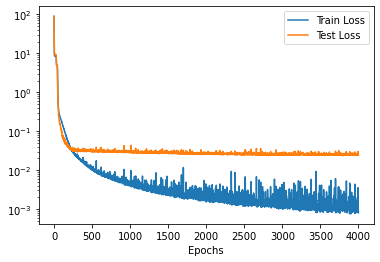

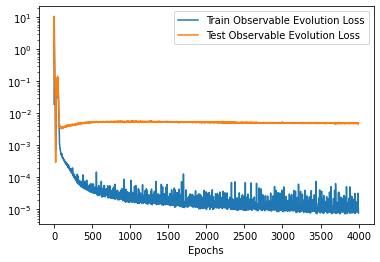

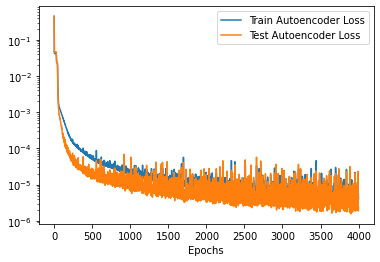

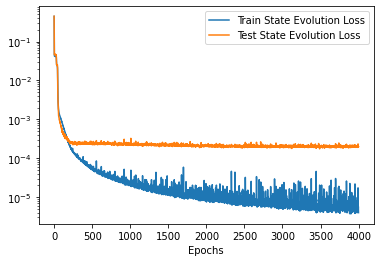

In [4]:
#Sort Models
# def param_find(model):
#     return model.seq_len
# models.sort(key = param_find)

# for model in models:
#     print(model.exp_name)

#plot learning curves
models[-1].plot_learning_curves()

In [5]:
#loading weights
# epoch_num = 1700

# #Non Transient data
# for i in range(len(models)):
#     if i==0:
#         epoch_num = 8059
#     elif i == 1:
#         epoch_num = 4999
#     elif i == 7:
#         epoch_num = 2990
#     else:
#         epoch_num = 2990
#     models[i].load_weights(epoch_num)

# Transient Data
for i in range(0,len(models)):
    if i == 0:
        epoch_num = 3999
    elif i == 1:
        epoch_num = 3999
    elif i == 2:
        epoch_num = 3950  
    elif i == 3:
        epoch_num = 3999
    elif i == 4:
        epoch_num = 3999
    elif i == 5:
        epoch_num = 3999
    elif i == 6:
        epoch_num = 3999
    models[i].load_weights(epoch_num)

In [6]:
#One Step Prediction
# models[-4].data_dir = models[-2].data_dir
models[-1].load_and_preproc_data()
models[-1].create_dataset(mode = "Train")
dataset = models[-1].train_dataset
num_trajs = models[-1].train_num_trajs

# eval_mza.train_size = 0.9
for i in range(1):#len(models)):
    i=-1
    # del eval_mza.lp_data 
    # torch.cuda.empty_cache()
    # del eval_mza.train_dataset
    # del eval_mza.train_dataloader
    if not models[i].deactivate_seqmodel:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE, koop_out, seqmodel_out = models[i].predict_onestep(dataset, num_trajs)
    else:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE = models[i].predict_onestep(dataset, num_trajs)
    print(x_nn_hat.shape, Phi_nn_hat.shape, Phi_nn.shape)

    #Plotting one step prediction
    x_nn_hat.shape


Data Shape:  (1, 671, 7938)
Not normalizing Input
Train_Shape:  (1, 603, 7938)
out of train
torch.Size([1, 603, 5]) torch.Size([1, 603, 7938]) torch.Size([1, 603, 7938])


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:769: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


In [7]:
#Load Data
with open('Data/2DCylinder/processed_data/pklfiles/nektar_cyl_data_20_dt0.25_T200.pkl', 'rb') as f:
    data_dict = pickle.load(f)


In [8]:
sub_X = data_dict["sub_X"]
sub_Y = data_dict["sub_Y"]
U_nn = Phi_nn_hat[...,:int(Phi_nn_hat.shape[-1]/2)].detach().cpu().numpy()
V_nn = Phi_nn_hat[...,int(Phi_nn_hat.shape[-1]/2):].detach().cpu().numpy()
U = Phi_nn[...,:int(Phi_nn.shape[-1]/2)].detach().cpu().numpy()
V = Phi_nn[...,int(Phi_nn.shape[-1]/2):].detach().cpu().numpy()

U_nn.shape, V_nn.shape, U.shape, V.shape


((1, 603, 3969), (1, 603, 3969), (1, 603, 3969), (1, 603, 3969))

In [9]:
def energy(u,v):
    k = 0.5*(np.mean(u**2,axis=-1) + np.mean(v**2,axis=-1))
    return k

k_pred = energy(U_nn,V_nn)
k = energy(U, V)

(1, 603)


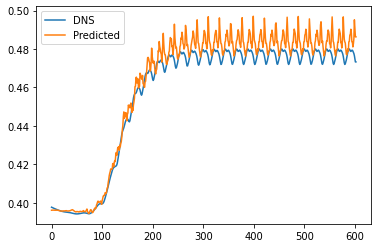

In [10]:
print(k.shape)
plt.plot(k[0,:], label = "DNS")
plt.plot(k_pred[0,:], label = "Predicted")
plt.legend()

In [ ]:
for i in range(100,150):
    plt.figure()
    plt.scatter(sub_X,sub_Y,c=abs((U_nn[0,i]-U[0,i])/U[0,i]), s=1, cmap = 'coolwarm')
    cbar = plt.colorbar()
    # Set the colorbar limits
    cbar.mappable.set_clim(vmin=0, vmax=0.1)
    plt.gca().set_aspect('equal')

    plt.savefig(models[-3].exp_dir + "/" + models[-3].exp_name + "/error_pred/")

# plt.axes().set_aspect('equal')

In [ ]:
for i in range (1):
    plt.figure()
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,0], label = "Predicted")
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], label = "DNS")
    plt.legend()

plt.ylabel("u0")
plt.xlabel("Timesteps")
plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")
plt.legend()

In [ ]:
for i in range (1):
    plt.figure()
    plt.plot(koop_out.cpu().numpy()[i,:,1], label = "Koopman Predicted")
    plt.plot(seqmodel_out.cpu().numpy()[i,:,1], label = "Seqmodel Predicted")
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,1], label = "DNS")
    plt.legend()

plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")
plt.legend()

In [ ]:
#defining moving average
def moving_avg(u):

    pdu  = pd.DataFrame(u)
    u_ma = pdu.expanding().mean()
    return u_ma

# print(u_ma.shape)

# plt.plot(np.arange(u.shape[1]),u[...,0].squeeze(), label = "Mean Energy")
# plt.plot(u_ma)
# # plt.plot(np.arange(ref_X.shape[0]),ref_X_ma, linewidth = 3, label = "Time Moving Average")
# plt.xlabel("Time Units")
# plt.ylabel("Mean Energy")
# plt.legend()

In [ ]:
Phi_nn_hat_ma = moving_avg(Phi_nn_hat.cpu().numpy())

plt.plot(Phi_nn_hat_ma)

In [11]:
#multistep prediction
timesteps = 400
initial_step = 0
initial_conditions = Phi_nn[:,initial_step,:].to(models[0].device)

x_hat = []
Phi_ms_hat = torch.zeros((len(models),1,timesteps+1,models[0].statedim)).to(models[0].device)

print("ic shape:", initial_conditions.shape)

for i in range(len(models)):
    x_hat_temp, Phi_ms_hat[i] = models[i].predict_multistep(initial_conditions, timesteps)
    x_hat.append(x_hat_temp)
print(Phi_ms_hat.shape)


ic shape: torch.Size([1, 7938])
torch.Size([7, 1, 401, 7938])


In [12]:
U_ms_hat = Phi_ms_hat[...,:int(Phi_ms_hat.shape[-1]/2)].detach().cpu().numpy()
V_ms_hat = Phi_ms_hat[...,int(Phi_ms_hat.shape[-1]/2):].detach().cpu().numpy()
U = Phi_nn[...,:int(Phi_nn.shape[-1]/2)].detach().cpu().numpy()
V = Phi_nn[...,int(Phi_nn.shape[-1]/2):].detach().cpu().numpy()

U_ms_hat.shape, V_ms_hat.shape, U.shape, V.shape

((7, 1, 401, 3969), (7, 1, 401, 3969), (1, 603, 3969), (1, 603, 3969))

(7, 1, 401)


Text(0, 0.5, 'kinetic energy')

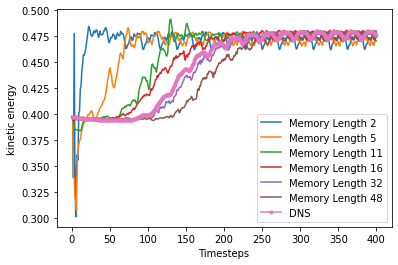

In [21]:
#calculating kinetic energy for multistep prediction
k_ms_pred = energy(U_ms_hat, V_ms_hat)
print(k_ms_pred.shape)
plt.figure()
for i in [0,1,3,4,5,6]:
    
    plt.plot(k_ms_pred[i,0,:], label = f"Memory Length {models[i].seq_len-1}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
plt.plot(k[0,initial_step:timesteps], ".-",label = "DNS")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("kinetic energy")

In [ ]:
for i in range (100,200,5):
    plt.figure()
    plt.scatter(sub_X,sub_Y,c=abs((U_ms_hat[-2,0,i]-U[0,i])/U[0,i]), s=1, cmap = 'coolwarm')
    # plt.scatter(sub_X,sub_Y,c = U_ms_hat[-1,0,i], s=1, cmap = 'coolwarm')
    cbar = plt.colorbar()
    # Set the colorbar limits
    cbar.mappable.set_clim(vmin=0, vmax=0.1)
    plt.gca().set_aspect('equal')

    # plt.savefig(models[-1].exp_dir + "/" + models[-1].exp_name + "/out_log/error_plots/fig"+str(i)+".png")

torch.Size([1, 603, 7938]) torch.Size([7, 1, 401, 7938])


Text(0, 0.5, 'MSE')

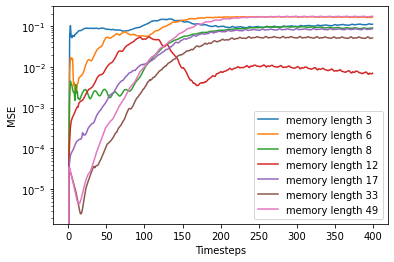

In [22]:
print(Phi_nn.shape, Phi_ms_hat.shape)
State_MSE_multistep = torch.zeros((len(models),timesteps))

plt.figure()
for i in [0,1,2,3,4,5,6]:#range(len(models)-3):
    State_MSE_multistep[i] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[i,:,:timesteps]).detach().cpu()
    # if i!=len(models)-1:
    plt.semilogy(State_MSE_multistep[i].numpy(), label = f"memory length {models[i].seq_len}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")

# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("MSE")
# np.save("koopman_numobs32.npy",Phi_hat.cpu().numpy())

Text(0, 0.5, 'MSE')

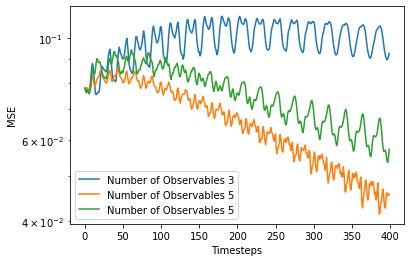

In [67]:
plt.figure()
for i in range(len(models)):
    State_MSE_multistep[i] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[i,:,:timesteps]).detach().cpu()
    plt.semilogy(State_MSE_multistep[i].numpy(), label = f"Number of Observables {models[i].num_obs}")

plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("MSE")

In [ ]:
import numpy
k1 = np.load("koopman_numobs4.npy")
k2 = np.load("koopman_numobs16.npy")
k3 = np.load("koopman_numobs32.npy")
k1.shape

plt.figure()
# plt.plot(k1[:,0])
plt.plot(np.linspace(0,101,1001),k2[0,:,1], label = "Koopman")
plt.plot(np.linspace(0,101,1001),Phi_nn[0,:1001,1].cpu().numpy(), label = "Target")
plt.plot(np.linspace(0,101,1001),Phi_hat.cpu().numpy()[0,:,1], label = "MZA Memory = 0.4 timeunits")
# plt.plot(k3[:,0])
plt.legend()
plt.xlabel("Timeunits")
plt.ylabel("u1")
k2.shape

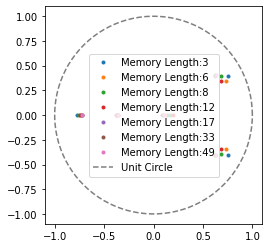

In [24]:
#eigenvalue study
plt.figure()
plt.gca().set_aspect('equal')
for i in [0,1,2,3,4,5,6]:#1,2,3,4]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    w, v = np.linalg.eig(mat)

    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    # plt.matshow(mat)
    # plt.colorbar()

    # plt.figure()
    
    plt.plot(np.real(w), np.imag(w), ".", label = f"Memory Length:{models[i].seq_len}")

angles = np.linspace(0, 2 * np.pi, 100)
unit_circle = np.exp(1j * angles)
plt.plot(unit_circle.real, unit_circle.imag, '--', label = "Unit Circle")
plt.legend()


In [ ]:
error = np.zeros((1,models[-1].num_obs))
for i in range(error.shape[1]):
    error[0,i] = np.linalg.norm(mat*v[:,i] - w[i]*mat,ord="fro")
print(error)

In [ ]:
#decoding the eigenvectors
print(v.shape)
tv = torch.tensor(np.real(v)).to(models[-2].device)

koopmodes = models[-2].model.autoencoder.recover(tv)
koopmodes.shape

In [ ]:
plt.figure()
plt.scatter(sub_X,sub_Y,c=koopmodes.detach().cpu().numpy()[0,:], s=1, cmap = 'coolwarm')